In [18]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


file = "WA Police Force Crime Timeseries.xlsx"
WAstats = pd.read_excel(file,sheet_name = "Data")

WAstats.fillna(0, inplace = True)


In [19]:
#list of regions
regionlist = WAstats['Website Region'].unique()
regionlist

array(['Armadale District', 'Cannington District', 'Fremantle District',
       'Goldfields-Esperance District', 'Great Southern District',
       'Joondalup District', 'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Midland District', 'Mirrabooka District', 'Perth District',
       'Pilbara District', 'Regional WA Region', 'South West District',
       'Western Australia', 'Wheatbelt District'], dtype=object)

In [20]:
#list of crimes
crimecatagories = WAstats[['WAPOL_Hierarchy_Lvl1','WAPOL_Hierarchy_Lvl2']].value_counts().reset_index()
crimecatagories.drop(columns=[0], inplace = True)
crimecatagories

,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_Lvl2
0,Threatening Behaviour (Non-Family),Threatening Behaviour (Non-Family)
1,Cultivate or Manufacture Drugs,Drug Offences
2,Kidnapping / Child Stealing,Deprivation of Liberty
3,Graffiti,Graffiti
4,Fraud (Not Elsewhere Classified),Fraud & Related Offences
5,Fraud (Credit Card),Fraud & Related Offences
6,Forgery,Fraud & Related Offences
7,Drug Possession,Drug Offences
8,Drug Dealing,Drug Offences
9,Driving Causing Death,Homicide


In [63]:
basiccrimedesc = WAstats['WAPOL_Hierarchy_Lvl2'].unique()
basiccrimedesc

array(['Homicide', 'Recent Sexual Offences', 'Historical Sexual Offences',
       'Assault (Family)', 'Assault (Non-Family)',
       'Threatening Behaviour (Family)',
       'Threatening Behaviour (Non-Family)', 'Deprivation of Liberty',
       'Robbery', 'Burglary', 'Stealing of Motor Vehicle', 'Stealing',
       'Property Damage', 'Arson', 'Drug Offences',
       'Receiving and Possession of Stolen Property',
       'Regulated Weapons Offences', 'Graffiti',
       'Fraud & Related Offences', 'Breach of Violence Restraint Order'],
      dtype=object)

In [22]:
#Regional DF
Regional_df = WAstats[WAstats["Website Region"]=="Regional WA Region"]
Regional_df.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
117600,Regional WA Region,1.1,Murder,1,Homicide,2007-01-01,2006-07,Regional WA RegionMurderHomicide12007,12007,0.0
117601,Regional WA Region,1.1,Murder,1,Homicide,2007-02-01,2006-07,Regional WA RegionMurderHomicide22007,22007,0.0
117602,Regional WA Region,1.1,Murder,1,Homicide,2007-03-01,2006-07,Regional WA RegionMurderHomicide32007,32007,0.0
117603,Regional WA Region,1.1,Murder,1,Homicide,2007-04-01,2006-07,Regional WA RegionMurderHomicide42007,42007,2.0
117604,Regional WA Region,1.1,Murder,1,Homicide,2007-05-01,2006-07,Regional WA RegionMurderHomicide52007,52007,1.0


In [35]:
Plotting_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
Plotting_df = Plotting_df[Plotting_df["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
Plotting_df['Period'] = Plotting_df['Period'].dt.strftime('%Y-%m')

In [38]:
Plotting = Plotting_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
Plotting

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2019-02,31.0,602.0,287.0,447.0,607.0,10.0,890.0,215.0,30.0,38.0,1.0,724.0,77.0,74.0,108.0,14.0,1151.0,121.0,86.0,76.0
2019-03,35.0,759.0,326.0,408.0,904.0,2.0,861.0,322.0,37.0,29.0,2.0,765.0,97.0,99.0,134.0,15.0,1216.0,198.0,94.0,95.0
2019-04,25.0,679.0,238.0,315.0,768.0,5.0,780.0,199.0,26.0,47.0,4.0,696.0,58.0,57.0,95.0,20.0,1253.0,136.0,90.0,70.0
2019-05,22.0,629.0,257.0,288.0,657.0,7.0,804.0,267.0,35.0,54.0,2.0,730.0,88.0,117.0,121.0,12.0,1192.0,144.0,94.0,80.0
2019-06,25.0,554.0,214.0,294.0,609.0,2.0,730.0,235.0,29.0,50.0,2.0,612.0,93.0,61.0,89.0,9.0,971.0,101.0,73.0,40.0
2019-07,30.0,619.0,230.0,323.0,470.0,6.0,790.0,189.0,21.0,45.0,1.0,633.0,78.0,75.0,126.0,10.0,927.0,90.0,70.0,66.0
2019-08,20.0,653.0,284.0,326.0,578.0,6.0,911.0,190.0,26.0,53.0,5.0,629.0,90.0,80.0,165.0,13.0,1014.0,87.0,121.0,70.0
2019-09,25.0,620.0,291.0,281.0,631.0,3.0,898.0,137.0,34.0,31.0,2.0,687.0,70.0,98.0,99.0,14.0,1078.0,162.0,80.0,69.0
2019-10,42.0,665.0,271.0,381.0,771.0,2.0,659.0,286.0,31.0,62.0,4.0,815.0,61.0,95.0,75.0,23.0,1115.0,139.0,95.0,59.0


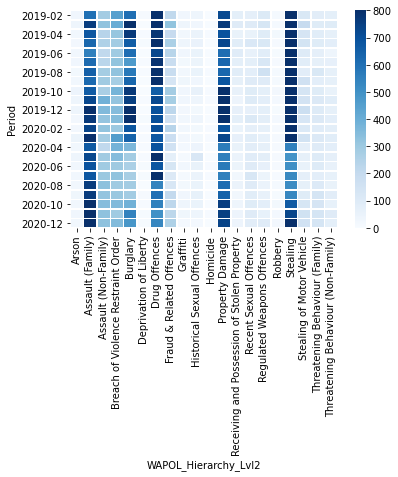

In [41]:
ax = sns.heatmap(Plotting, linewidth=0.5,cmap="Blues", vmin= 0, vmax=800)
plt.show()

In [81]:
TopCrimes = Plotting_df.groupby('WAPOL_Hierarchy_Lvl2')["COUNT_of_Offnc_ID"].sum().sort_values(ascending = False)
keycrimes = TopCrimes[0:6].index.tolist()
keycrimes

['Stealing',
 'Assault (Family)',
 'Drug Offences',
 'Property Damage',
 'Burglary',
 'Breach of Violence Restraint Order']

In [82]:
keycrimes_df = Plotting_df[Plotting_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]
keycrimespivot = keycrimes_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Period,,,,,,
2019-02,602.0,447.0,607.0,890.0,724.0,1151.0
2019-03,759.0,408.0,904.0,861.0,765.0,1216.0
2019-04,679.0,315.0,768.0,780.0,696.0,1253.0
2019-05,629.0,288.0,657.0,804.0,730.0,1192.0
2019-06,554.0,294.0,609.0,730.0,612.0,971.0
2019-07,619.0,323.0,470.0,790.0,633.0,927.0
2019-08,653.0,326.0,578.0,911.0,629.0,1014.0
2019-09,620.0,281.0,631.0,898.0,687.0,1078.0
2019-10,665.0,381.0,771.0,659.0,815.0,1115.0


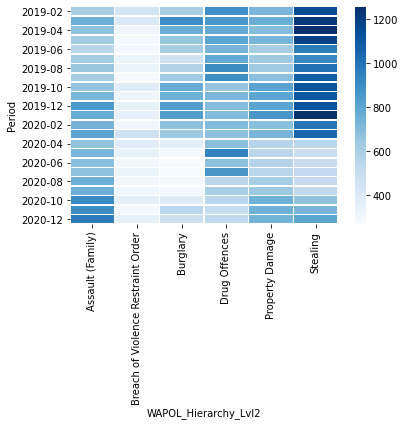

In [83]:
ax = sns.heatmap(keycrimespivot, linewidth=0.5,cmap="Blues")
plt.show()

In [80]:
plot_df = Regional_df[(Regional_df["Year"] == "2019-20") | (Regional_df["Year"] == "2020-21")]
plot_df = plot_df[plot_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]

In [81]:
plot_df = plot_df[['WAPOL_Hierarchy_Lvl1','WAPOL_Hierarchy_Lvl2','Period','COUNT_of_Offnc_ID']].sort_values("Period", ascending = True)

In [82]:
plot_df

,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_Lvl2,Period,COUNT_of_Offnc_ID
117750,Murder,Homicide,2019-07-01 00:00:00,0
120774,Deprivation of Liberty,Deprivation of Liberty,2019-07-01 00:00:00,6
118254,Driving Causing Death,Homicide,2019-07-01 00:00:00,1
120606,Kidnapping / Child Stealing,Deprivation of Liberty,2019-07-01 00:00:00,0
118422,Sexual Assault,Recent Sexual Offences,2019-07-01 00:00:00,60
...,...,...,...,...
118103,Manslaughter,Homicide,2020-12-01 00:00:00,0
120623,Kidnapping / Child Stealing,Deprivation of Liberty,2020-12-01 00:00:00,0
117935,Attempted / Conspiracy to Murder,Homicide,2020-12-01 00:00:00,0
120119,Possess Weapon to Cause Fear (Family),Threatening Behaviour (Family),2020-12-01 00:00:00,37


IndexError: index 10 is out of bounds for axis 0 with size 10

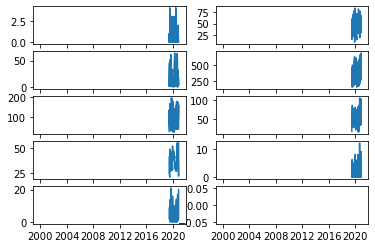

In [13]:
a = 0
fig, axs = plt.subplots(5,2, sharex=True, sharey=False)
axs = axs.ravel()

for crime in basiccrimedesc:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']   
    axs[a].plot(x,y)
    a += 1
plt.figure(figsize=(20,12))
plt.savefig("Crime.png")
 
plt.show()        




In [83]:
new = plot_df[['WAPOL_Hierarchy_Lvl2','Period','COUNT_of_Offnc_ID']].set_index(['WAPOL_Hierarchy_Lvl2'])
ax = sns.heatmap(new, linewidth=0.5)
plt.show()


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [34]:
new

,Period,COUNT_of_Offnc_ID
WAPOL_Hierarchy_Lvl2,,
Homicide,2019-07-01,0.0
Deprivation of Liberty,2019-07-01,6.0
Homicide,2019-07-01,1.0
Deprivation of Liberty,2019-07-01,0.0
Recent Sexual Offences,2019-07-01,60.0
...,...,...
Homicide,2020-12-01,0.0
Deprivation of Liberty,2020-12-01,0.0
Homicide,2020-12-01,0.0


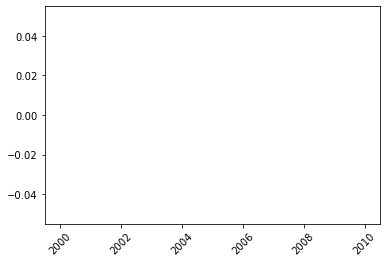

In [32]:
plt.plot(plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period'],plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
for crime in keycrimes:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']  
    plt.scatter(x,y, label=crime)
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     